In [4]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
uri_to_data_frame = "https://raw.githubusercontent.com/sherri-ice/DataAnalyseProject/main/dataframe.csv"
data_frame =  pd.read_csv(uri_to_data_frame)
data_frame

,Отметка времени,Ваш пол,Ваш факультет,Ваш средний балл,"Сколько времени в среднем в день Вы уделяете учебе (домашние работы, лабораторные)",Ваш знак зодиака,Как часто Вы пьёте алкоголь?,Как часто Вы курите (сигареты/вейп/кальян)?,Как часто Вы пьёте кофе/энергетики?,Работаете ли Вы на данный момент?,Как часто Вы посещаете пары?,Сколько Вы спите в будний день?,Были ли у Вас серьёзные мысли об отчислении?,"Были ли у Вас мысли о суициде, была ли депрессия?",Болели ли Вы Covid-19?,Как часто Вы ходите в библиотеку?,Кем Вы себя считаете?,Состоите ли Вы в Студенческом союзе или похожих организациях?,Есть ли у Вас хобби вне университета?,Есть ли у Вас отношения?,Занимаетесь ли Вы спортом?,Вы учитесь на платной или бесплатной основе?,Количество пересдач за всё время обучения,Вы натуральный блондин
0,2021/11/26 12:21:04 PM GMT+3,Предпочитаю не говорить (подаюсь в гугл),ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Рыбы,Не пью,Не курю,Не пью,Нет,Пропускаю <25% пар в неделю,7-8 часов в сутки,Да,Нет,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Нет,Да,Да,"Да, но только на физре","Бесплатно, потерял стипендию",1-5 пересдач,Нет(
1,2021/11/26 12:21:41 PM GMT+3,Предпочитаю не говорить (подаюсь в гугл),ФПМИ,5.1 - 7.0,Максимум 2 часа,Дева,Раз в месяц,Не курю,Пью почти каждый день,Нет,Пропускаю <25% пар в неделю,4-6 часов в сутки,Да,Да,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Нет,Да,Да,"Да, но только на физре",Платно,1-5 пересдач,Нет(
2,2021/11/26 12:21:57 PM GMT+3,Мужской,ФПМИ,7.1 - 8.0,"Могу посидеть и 3, и 4",Козерог,Не пью,Не курю,"Пью реже, чем раз в две недели","Да, по специальности",Хожу на все пары,7-8 часов в сутки,Нет,Нет,"Нет, не болел",Не хожу в библиотеку,Интроверт,Нет,Да,Нет,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
3,2021/11/26 12:22:31 PM GMT+3,Женский,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Весы,Раз в месяц,Не курю,Пью 1-3 раза в неделю,Нет,Хожу на все пары,7-8 часов в сутки,Да,Да,"Нет, не болел","Редко, 1-2 раза в месяц",Амбиверт,Нет,Да,Нет,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),"Да, на всю страну такой один"
4,2021/11/26 12:22:53 PM GMT+3,Мужской,ФПМИ,8.1 - 9.0,Ботаю ол дэй лонг,Овен,Раз в неделю,"Реже, чем раз в день","Пью реже, чем раз в две недели","Да, по специальности",Пропускаю >70% пар в неделю,7-8 часов в сутки,Нет,Нет,"Нет, не болел",Не хожу в библиотеку,Экстраверт,Нет,Да,Да,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2021/11/29 2:10:27 PM GMT+3,Мужской,Физфак,5.1 - 7.0,"Могу посидеть и 3, и 4",Овен,Раз в месяц,Не курю,Пью почти каждый день,Нет,Хожу на все пары,4-6 часов в сутки,Нет,Нет,"Нет, не болел",Не хожу в библиотеку,Экстраверт,Нет,Да,Да,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
208,2021/11/29 2:10:35 PM GMT+3,Женский,Физфак,5.1 - 7.0,Максимум 2 часа,Весы,Не пью,Не курю,"Пью реже, чем раз в две недели","Да, не по специальности",Пропускаю <25% пар в неделю,4-6 часов в сутки,Да,Да,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Да,Да,Да,"Да, но только на физре","Бесплатно, получаю стипендию",1-5 пересдач,Нет(
209,2021/11/29 3:21:37 PM GMT+3,Мужской,Физфак,5.1 - 7.0,"Могу посидеть и 3, и 4",Весы,Не пью,Не курю,Не пью,"Да, не по специальности",Хожу на все пары,7-8 часов в сутки,Нет,Нет,"Да, во время студенчества",Не хожу в библиотеку,Амбиверт,Нет,Нет,Нет,"Да, но только на физре","Бесплатно, получаю стипендию",1-5 пересдач,"Да, на всю страну такой один"
210,2021/11/30 1:20:18 AM GMT+3,Мужской,Физфак,5.1 - 7.0,0 часов 0 минут 0 секунд,Козерог,"Чаще, чем раз в неделю","Больше, чем 3 раза в день","Пью реже, чем раз в две недели","Да, по специальности",Пропускаю <25% пар в неделю,4-6 часов в сутки,Да,Нет,"Нет, не болел",Не хожу в библиотеку,Интроверт,Нет,Да,Да,"Да, вне физры",Платно,Не пересдавал(а),Нет(


#Чистим датасет

Переименуем колонки для более компактного кода

In [6]:
data_frame.rename(columns = {'Отметка времени':'time', \
                             'Ваш пол':'gender', \
                             'Ваш факультет': 'faculty',\
                             'Ваш средний балл': 'average_grade',
                             'Сколько времени в среднем в день Вы уделяете учебе (домашние работы, лабораторные)':'study_time',\
                             'Ваш знак зодиака': 'zodiac_sign',\
                             'Как часто Вы пьёте алкоголь?': 'alcohol',\
                             'Как часто Вы курите (сигареты/вейп/кальян)?': 'smoke',\
                             'Как часто Вы пьёте кофе/энергетики?': 'coffee',\
                             'Работаете ли Вы на данный момент?': 'work', \
                             'Как часто Вы посещаете пары?': 'attendance', \
                             'Сколько Вы спите в будний день?': 'sleep',\
                             'Были ли у Вас серьёзные мысли об отчислении?':'expulsion', \
                             'Были ли у Вас мысли о суициде, была ли депрессия?': 'depression',
                             'Болели ли Вы Covid-19?': 'covid19',
                             'Как часто Вы ходите в библиотеку?': 'library_attendance',\
                             'Кем Вы себя считаете?': 'person_type', \
                             'Состоите ли Вы в Студенческом союзе или похожих организациях?': 'student_union', \
                             'Есть ли у Вас хобби вне университета?': 'hobby',\
                             'Есть ли у Вас отношения?': 'relationship',\
                             'Занимаетесь ли Вы спортом?': 'sport',\
                             'Вы учитесь на платной или бесплатной основе?': 'education_type', \
                             'Количество пересдач за всё время обучения': 'failed_exams',
                             'Вы натуральный блондин': 'blond'},\
                             inplace=True)


Удалим столбец с временем заполнения формы, он нас не интересует:

In [7]:
data_frame = data_frame.drop('time', axis = 1)

В некотрых столбцах заменим данные типа Да/Нет на True/False. Помимо этого для столбца `covid19` в опросе уточнялось, когда именно вы болели: до поступления или во время вашего студенчества. Мы решаем, что нам важнее просто информация о том, болел ли человек, поэтому заменяем оба этих варианта на True.

In [8]:
data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 'blond']] = data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 
                                                                                                        'blond']].replace(['Да, во время студенчества', 'Да, до поступления', 'Да', 
                                                                                                                           'Да, на всю страну такой один'], True)
data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 'blond']] = data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 
                                                                                                        'blond']].replace(['Нет, не болел', 'Нет', 'Нет('], False)

В колонке `gender` помимо вариантов ответа "мужской", "женский", мы получили несколько неопределенных вариантов, которые для нас равносильны `Nan`. Просто выкинуть их из датасета мы не можем, так как нам важна остальная информация в этих строчках.

In [9]:
data_frame.gender

0      Предпочитаю не говорить (подаюсь в гугл)
1      Предпочитаю не говорить (подаюсь в гугл)
2                                       Мужской
3                                       Женский
4                                       Мужской
                         ...                   
207                                     Мужской
208                                     Женский
209                                     Мужской
210                                     Мужской
211                                     Мужской
Name: gender, Length: 212, dtype: object

Так как корректных данных в колонке гораздо больше, мы решили невалидные данные заменить в том же процентном отношении, в котором сейчас находятся ответы Мужской / Женский.

In [10]:
data_frame['gender'].replace(['Мужской'], 'm', inplace = True)
data_frame['gender'].replace(['Женский'], 'f', inplace = True)
gender = data_frame.loc[:, 'gender']
gender = DataFrame(gender.value_counts())

num_of_men = gender.loc['m']
num_of_women = gender.loc['f']
percent_of_men = num_of_men / (num_of_women + num_of_men)
num_of_men = int(gender.loc['Предпочитаю не говорить (подаюсь в гугл)'] * percent_of_men) 
num_of_women = int(gender.loc['Предпочитаю не говорить (подаюсь в гугл)'] - num_of_men)

In [11]:
data_frame.gender.replace(['Предпочитаю не говорить (подаюсь в гугл)'], np.nan, inplace = True)
print('Уникальные поля до замены ', data_frame.gender.unique())
data_frame.gender.fillna('m', limit = num_of_men, inplace = True)
print('Уникальные поля после замены части Nan-ов ', data_frame.gender.unique())
data_frame.gender.fillna('f', limit = num_of_women, inplace = True)
print('Уникальные поля после замены всех некорректных данных ', data_frame.gender.unique())

Уникальные поля до замены  [nan 'm' 'f']
Уникальные поля после замены части Nan-ов  ['m' 'f' nan]
Уникальные поля после замены всех некорректных данных  ['m' 'f']


Рассмотри колонку `faculty`. Из графика видно, что получилось неоднородная выборка по факультетам университета. Поэтому в дальнейшем учитывать принадлежность к факультету мы не будем.

<BarContainer object of 15 artists>

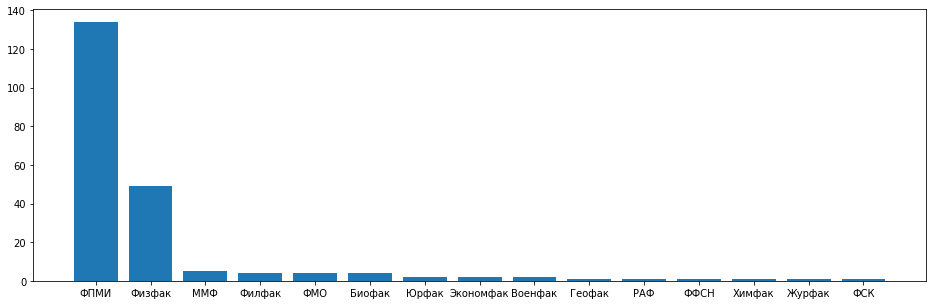

In [12]:
plt.figure(figsize=(16, 5))
unique_faculty = data_frame.faculty.value_counts()
plt.xticks(np.arange(unique_faculty.index.size), unique_faculty.index)
plt.bar(range(data_frame.faculty.unique().size), data_frame.faculty.value_counts())

In [13]:
data_frame

,gender,faculty,average_grade,study_time,zodiac_sign,alcohol,smoke,coffee,work,attendance,sleep,expulsion,depression,covid19,library_attendance,person_type,student_union,hobby,relationship,sport,education_type,failed_exams,blond
0,m,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Рыбы,Не пью,Не курю,Не пью,Нет,Пропускаю <25% пар в неделю,7-8 часов в сутки,True,False,True,Не хожу в библиотеку,Интроверт,False,True,True,"Да, но только на физре","Бесплатно, потерял стипендию",1-5 пересдач,False
1,m,ФПМИ,5.1 - 7.0,Максимум 2 часа,Дева,Раз в месяц,Не курю,Пью почти каждый день,Нет,Пропускаю <25% пар в неделю,4-6 часов в сутки,True,True,True,Не хожу в библиотеку,Интроверт,False,True,True,"Да, но только на физре",Платно,1-5 пересдач,False
2,m,ФПМИ,7.1 - 8.0,"Могу посидеть и 3, и 4",Козерог,Не пью,Не курю,"Пью реже, чем раз в две недели","Да, по специальности",Хожу на все пары,7-8 часов в сутки,False,False,False,Не хожу в библиотеку,Интроверт,False,True,False,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
3,f,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Весы,Раз в месяц,Не курю,Пью 1-3 раза в неделю,Нет,Хожу на все пары,7-8 часов в сутки,True,True,False,"Редко, 1-2 раза в месяц",Амбиверт,False,True,False,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),True
4,m,ФПМИ,8.1 - 9.0,Ботаю ол дэй лонг,Овен,Раз в неделю,"Реже, чем раз в день","Пью реже, чем раз в две недели","Да, по специальности",Пропускаю >70% пар в неделю,7-8 часов в сутки,False,False,False,Не хожу в библиотеку,Экстраверт,False,True,True,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,m,Физфак,5.1 - 7.0,"Могу посидеть и 3, и 4",Овен,Раз в месяц,Не курю,Пью почти каждый день,Нет,Хожу на все пары,4-6 часов в сутки,False,False,False,Не хожу в библиотеку,Экстраверт,False,True,True,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),False
208,f,Физфак,5.1 - 7.0,Максимум 2 часа,Весы,Не пью,Не курю,"Пью реже, чем раз в две недели","Да, не по специальности",Пропускаю <25% пар в неделю,4-6 часов в сутки,True,True,True,Не хожу в библиотеку,Интроверт,True,True,True,"Да, но только на физре","Бесплатно, получаю стипендию",1-5 пересдач,False
209,m,Физфак,5.1 - 7.0,"Могу посидеть и 3, и 4",Весы,Не пью,Не курю,Не пью,"Да, не по специальности",Хожу на все пары,7-8 часов в сутки,False,False,True,Не хожу в библиотеку,Амбиверт,False,False,False,"Да, но только на физре","Бесплатно, получаю стипендию",1-5 пересдач,True
210,m,Физфак,5.1 - 7.0,0 часов 0 минут 0 секунд,Козерог,"Чаще, чем раз в неделю","Больше, чем 3 раза в день","Пью реже, чем раз в две недели","Да, по специальности",Пропускаю <25% пар в неделю,4-6 часов в сутки,True,False,False,Не хожу в библиотеку,Интроверт,False,True,True,"Да, вне физры",Платно,Не пересдавал(а),False
